In [43]:
import rfphate
import cebra
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
import itertools

In [44]:
path = 'data/'
dataset_name = 'treeData'
data = pd.read_csv(path + dataset_name + '.csv', sep = ',')
x, y = rfphate.dataprep(data)

In [45]:
cebra.CEBRA()

CEBRA()

In [ ]:
# Define parameter grid for grid search
param_grid = {
    # 'learning_rate': [1e-4, 3e-4, 1e-3],  # Common learning rates for contrastive learning
    'learning_rate': [1e-4],  # Common learning rates for contrastive learning
    'batch_size': [512],  # Trade-off between speed and stability
    # 'output_dimension': [3, 8, 16],  # Embedding space dimensionality
    'output_dimension': [3],  # Embedding space dimensionality
    'num_hidden_units': [32, 64, 128],  # Capacity of the network
    'temperature': [0.01, 1.0],  # Contrastive loss temperature
    'distance': ['euclidean', 'cosine'],  # Distance metric for contrastive loss
}

In [ ]:
from joblib import Parallel, delayed

# Create all combinations of parameters
param_combinations = list(itertools.product(*param_grid.values()))

# Iterate over each combination

embeddings = []
def train_model(params):
    param_dict = dict(zip(param_grid.keys(), params))
    
    # Initialize model with given parameters
    model = cebra.CEBRA(**param_dict)
    emb = model.fit_transform(x, y)

  
    # Return model and its parameters
    return param_dict, emb

# Run in parallel
embeddings = Parallel(n_jobs=-1)(delayed(train_model)(params) for params in param_combinations)

# Output the tested configurations
for config, _ in embeddings:
    print(config)


/yunity/rhodes8/anaconda3/envs/rfphate-quant/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/yunity/rhodes8/anaconda3/envs/rfphate-quant/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/yunity/rhodes8/anaconda3/envs/rfphate-quant/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/yunity/rhodes8/anaconda3/envs/rfphate-quant/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed 

{'learning_rate': 0.0001, 'batch_size': 512, 'output_dimension': 3, 'num_hidden_units': 32, 'temperature': 0.01}
{'learning_rate': 0.0001, 'batch_size': 512, 'output_dimension': 3, 'num_hidden_units': 32, 'temperature': 1.0}
{'learning_rate': 0.0001, 'batch_size': 512, 'output_dimension': 3, 'num_hidden_units': 64, 'temperature': 0.01}
{'learning_rate': 0.0001, 'batch_size': 512, 'output_dimension': 3, 'num_hidden_units': 64, 'temperature': 1.0}
{'learning_rate': 0.0001, 'batch_size': 512, 'output_dimension': 3, 'num_hidden_units': 128, 'temperature': 0.01}
{'learning_rate': 0.0001, 'batch_size': 512, 'output_dimension': 3, 'num_hidden_units': 128, 'temperature': 1.0}


In [48]:
import seaborn as sns
import time

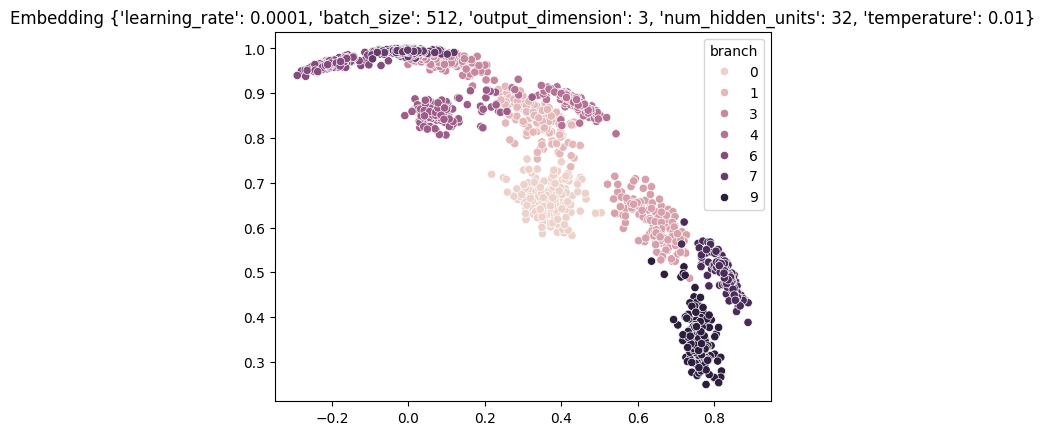

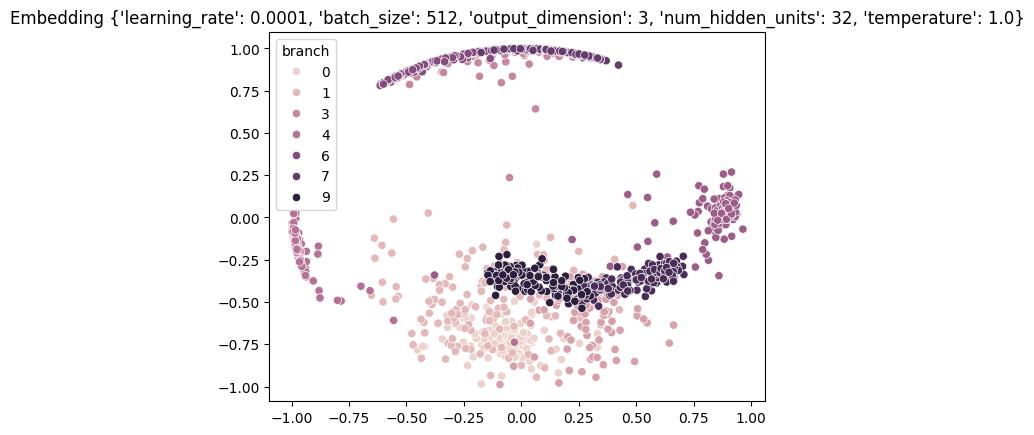

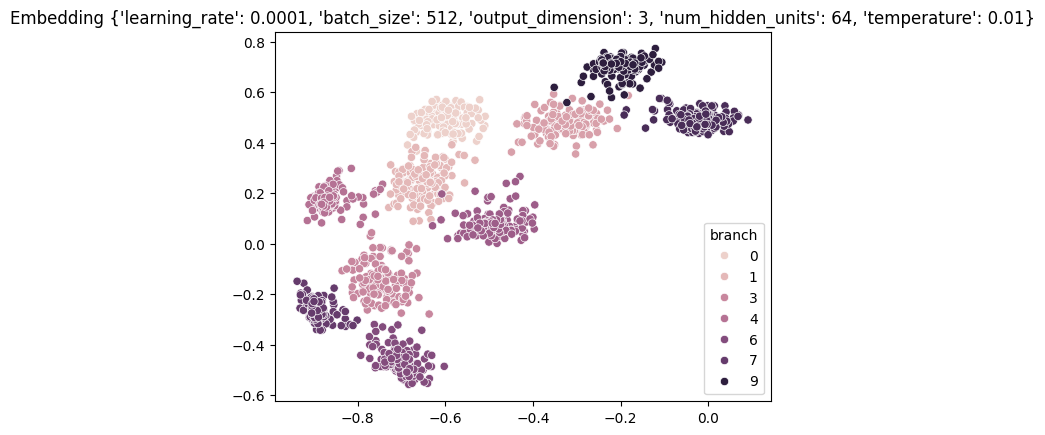

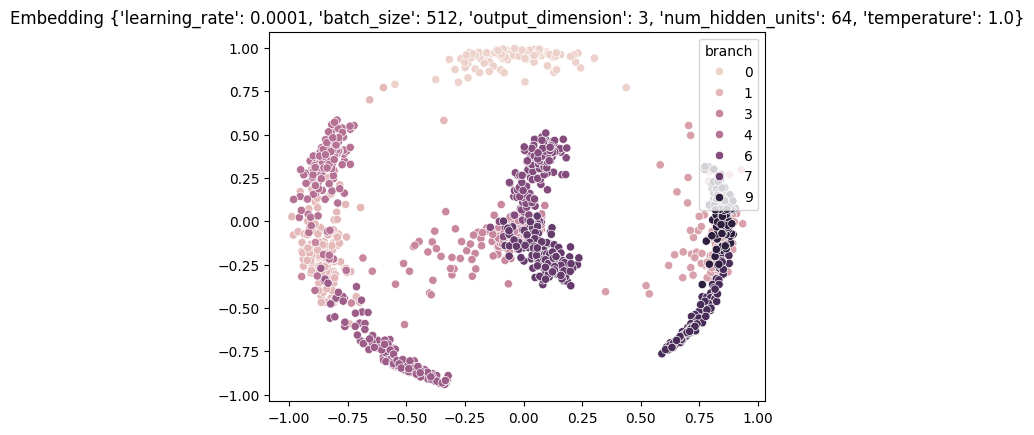

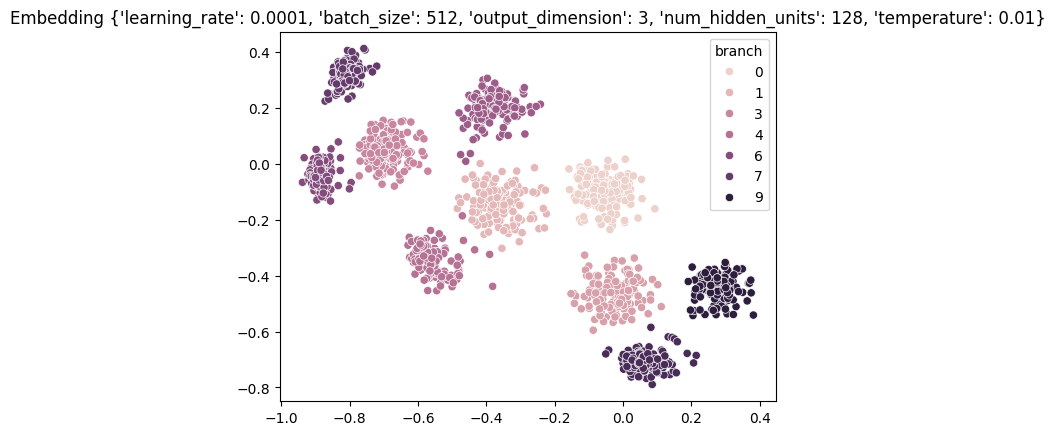

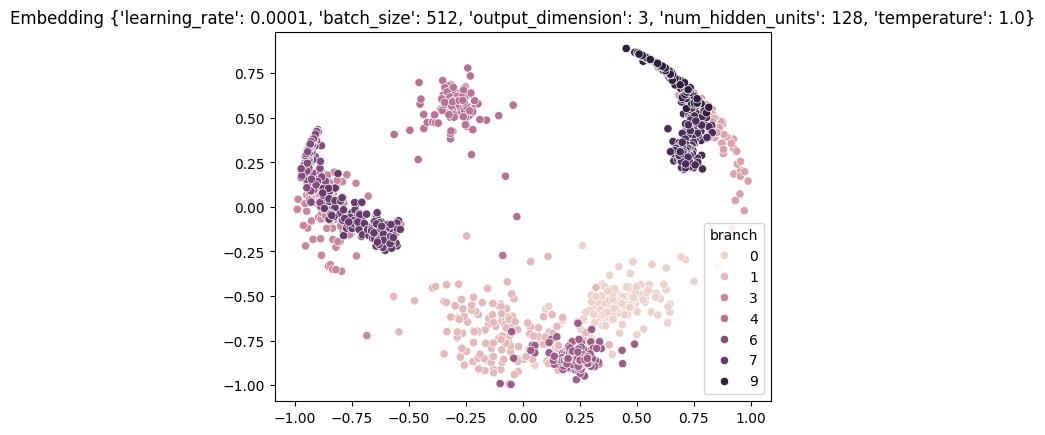

In [49]:
import matplotlib.pyplot as plt

for i, embedding_model in enumerate(embeddings):
    # Get the parameters and the embedding
    params, embedding = embedding_model

    sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=y)
    plt.title(f"Embedding {params}")
    plt.show()
    time.sleep(1)


In [74]:
embedding = embeddings[4][1]

In [75]:
import plotly.express as px

px.scatter_3d(x=embedding[:, 0], y=embedding[:, 1], z=embedding[:, 2], color=y, height = 1000)